Hello, the flow of the work for this paper will be as follows:
1. read the data
2. scale the data
3. visualise the data
4. split the data
5. get feature importance (permutation)
6. visualize the best N imported features
7. try from (1, 5, 10, 50) best features
    10, 20, 30, 40, 50 Freq. Random
8. the split should be (70, 30)
9. try up to 6 different classification models (RF, XGB, SVM, LR, KNNs, MD)
10. get the error bars and make comparisons

In [1]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created
import numpy as np
import matplotlib.pyplot as plt
from source.roc import draw_roc 


### 1. read the data

In [2]:
df = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

In [3]:
df.head(5)

,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,GS-ch-bruise1h-11a,B,1h,S1,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879


In [4]:
df.shape

(503, 2078)

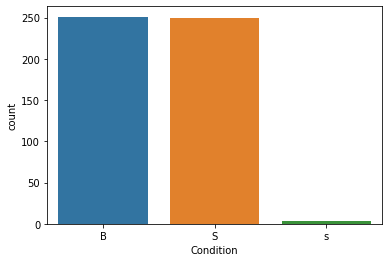

In [5]:
ax = sns.countplot(x="Condition",data=df)


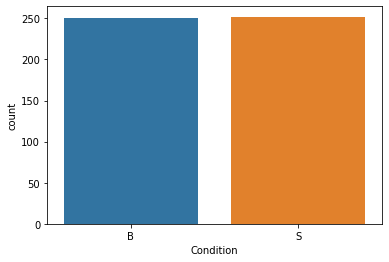

In [6]:
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)


#### getting x, and y

In [7]:
df_input= df.drop(['Sample', 'Condition', 'Age', 'Source'], axis=1)
df_input


,11995.490,11991.630,11987.780,11983.920,11980.060,11976.210,11972.350,11968.490,11964.640,11960.780,...,4034.497,4030.640,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.640,3999.783
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,-0.137664,-0.138295,-0.139098,-0.139391,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,-0.142162,-0.142754,-0.143336,-0.143301,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,-0.166405,-0.166787,-0.167322,-0.167319,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.005843,-0.005746,-0.005965,-0.006040,-0.005732,-0.005905,-0.006496,-0.006305,-0.005184,-0.004249,...,0.823532,0.825095,0.831351,0.830832,0.824308,0.817157,0.814575,0.815848,0.817096,0.823652
499,-0.010555,-0.009949,-0.010038,-0.010154,-0.010212,-0.010717,-0.010729,-0.009878,-0.009303,-0.009316,...,0.647229,0.642954,0.642807,0.646312,0.650215,0.651266,0.648941,0.648903,0.655380,0.662244
500,-0.054230,-0.054836,-0.055471,-0.055616,-0.055853,-0.056578,-0.056854,-0.055983,-0.054825,-0.054404,...,0.403613,0.404402,0.408775,0.410042,0.406809,0.405787,0.406463,0.405325,0.406469,0.410188
501,0.052804,0.052833,0.053037,0.053045,0.052818,0.052379,0.052130,0.052272,0.052694,0.053489,...,1.357465,1.369164,1.395378,1.412128,1.423115,1.429553,1.404126,1.366339,1.349845,1.325851


In [8]:
y = df['Condition']
y

0      B
1      B
2      S
3      S
4      B
      ..
498    S
499    S
500    B
501    S
502    S
Name: Condition, Length: 503, dtype: object

### 2.scale the data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_scaled = scaler.fit_transform(df_input)

df_input_scaled = pd.DataFrame(input_scaled, columns = df_input.columns)
# df_input_scaled['class'] = df['Condition']

df_input_scaled

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(


,11995.490,11991.630,11987.780,11983.920,11980.060,11976.210,11972.350,11968.490,11964.640,11960.780,...,4034.497,4030.640,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.640,3999.783
0,-0.808493,-0.807557,-0.808127,-0.809277,-0.810315,-0.809986,-0.808822,-0.810160,-0.814925,-0.817989,...,-0.408186,-0.390167,-0.395094,-0.416035,-0.416191,-0.393794,-0.376064,-0.394183,-0.438806,-0.461273
1,-1.045204,-1.042834,-1.040064,-1.039891,-1.041951,-1.041888,-1.039677,-1.039588,-1.042774,-1.045571,...,-1.982225,-1.971150,-1.966837,-1.972678,-1.980933,-1.986981,-1.992071,-1.999241,-2.010441,-2.015706
2,-0.933558,-0.930759,-0.930131,-0.930111,-0.930078,-0.929796,-0.930579,-0.933991,-0.938503,-0.941131,...,-0.543787,-0.546740,-0.556853,-0.563482,-0.553554,-0.538869,-0.526329,-0.530286,-0.579681,-0.641481
3,-0.956279,-0.954154,-0.953762,-0.953193,-0.951764,-0.951278,-0.952847,-0.956050,-0.959460,-0.960475,...,-1.022473,-1.018331,-1.003590,-0.988366,-0.989729,-1.006131,-1.027455,-1.034726,-1.020874,-0.996992
4,-1.071554,-1.068693,-1.068226,-1.068877,-1.070526,-1.072038,-1.072885,-1.074952,-1.078072,-1.079284,...,-1.637289,-1.630079,-1.636046,-1.644734,-1.633950,-1.608915,-1.587258,-1.577930,-1.585577,-1.603032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.275430,-0.274320,-0.274200,-0.274479,-0.274608,-0.277242,-0.281107,-0.280976,-0.276278,-0.272611,...,-0.491406,-0.485925,-0.464286,-0.467758,-0.490807,-0.515450,-0.524820,-0.519023,-0.512824,-0.488398
499,-0.298707,-0.295062,-0.294296,-0.294798,-0.296765,-0.301067,-0.302066,-0.298652,-0.296644,-0.297677,...,-1.157046,-1.173071,-1.175726,-1.162370,-1.142283,-1.133218,-1.141321,-1.142113,-1.121310,-1.100813
500,-0.514468,-0.516540,-0.518424,-0.519333,-0.522529,-0.528154,-0.530454,-0.526756,-0.521762,-0.520717,...,-2.076827,-2.073034,-2.058804,-2.051791,-2.053137,-2.047367,-2.043846,-2.051221,-2.057879,-2.057166
501,0.014295,0.014717,0.016864,0.017340,0.015010,0.011359,0.009173,0.008830,0.009937,0.013005,...,1.524477,1.566631,1.663975,1.720487,1.749993,1.765076,1.669538,1.535575,1.491738,1.417050


### 3. visualize the data

In [10]:
n = 50
target = np.array(df['Condition'])
rand  = np.random.randint(len(target), size= n)
rand

array([190,  62, 219, 407,  35, 382, 358, 316, 400, 411, 411, 396,  67,
       197, 468, 286, 153, 256, 477, 186, 173, 364, 473,  15, 321, 152,
        33, 433, 250, 166,  20, 224, 113, 164,  31, 297, 136, 165,  27,
       308, 131,  96, 391, 260, 328, 129, 392, 304, 241, 288])

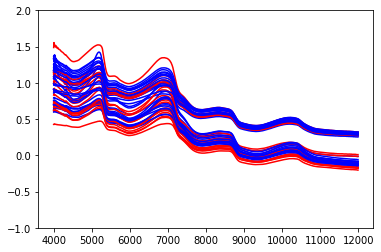

In [11]:
for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input.iloc[i]).flatten()
    if target[i] == 'S':
        plt.plot(np.array(df_input.columns), lineSpec, color = 'red')
    if target[i] == 'B':
        plt.plot(np.array(df_input.columns), lineSpec, color = 'blue')
    plt.ylim(-1, 2)
plt.show()

In [12]:
# for t in range (n):
#     i = rand[t]
#     lineSpec =  np.array(df_input.iloc[i]).flatten()
#     # if target[i] == 'S':
#     #     plt.plot(np.array(df_input.columns), lineSpec, color = 'red')
#     if target[i] == 'B':
#         plt.plot(np.array(df_input.columns), lineSpec, color = 'blue')
#     plt.ylim(-1, 2)
# plt.show()

### 4. split the data

In [13]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_scaled, y, test_size = 0.4, random_state=3, stratify=y) # train and valid sets

In [14]:
print(Xtrain.shape)
print(Xtest.shape)

(301, 2074)
(202, 2074)


### 5- permutation_importance

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
from matplotlib import pyplot

attrNames = np.array(df_input_scaled.columns)
attrNames

array([11995.49, 11991.63, 11987.78, ..., 4007.497, 4003.64, 3999.783],
      dtype=object)

In [16]:
featureImport = []

In [17]:
for i in range (50): # take the average of 3 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
    print("itr: " + str(i))
    RandomStateValid = randrange(50)
    ranodmSplitValid = random.uniform(0.2, 0.5)
    XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
    print("Train shape: "+str(XtrainPer.shape))
    print("Valid shape: "+str(XvalidPer.shape))
    print()
   
    # train
    model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
    model.fit(XtrainPer, YtrainPer)
    
    results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 10, n_jobs = -1)
    importance = results.importances_mean
    # print(importance)

    featureImport.append(importance)

itr: 0
Train shape: (156, 2074)
Valid shape: (145, 2074)

itr: 1
Train shape: (185, 2074)
Valid shape: (116, 2074)

itr: 2
Train shape: (234, 2074)
Valid shape: (67, 2074)

itr: 3
Train shape: (238, 2074)
Valid shape: (63, 2074)

itr: 4
Train shape: (153, 2074)
Valid shape: (148, 2074)

itr: 5
Train shape: (228, 2074)
Valid shape: (73, 2074)

itr: 6
Train shape: (165, 2074)
Valid shape: (136, 2074)

itr: 7
Train shape: (211, 2074)
Valid shape: (90, 2074)

itr: 8
Train shape: (230, 2074)
Valid shape: (71, 2074)

itr: 9
Train shape: (176, 2074)
Valid shape: (125, 2074)

itr: 10
Train shape: (173, 2074)
Valid shape: (128, 2074)

itr: 11
Train shape: (164, 2074)
Valid shape: (137, 2074)

itr: 12
Train shape: (203, 2074)
Valid shape: (98, 2074)

itr: 13
Train shape: (191, 2074)
Valid shape: (110, 2074)

itr: 14
Train shape: (226, 2074)
Valid shape: (75, 2074)

itr: 15
Train shape: (152, 2074)
Valid shape: (149, 2074)

itr: 16
Train shape: (196, 2074)
Valid shape: (105, 2074)

itr: 17
Train 

In [22]:
print(np.array(featureImport).shape)

arrimp = np.array(featureImport).mean(0)
print(arrimp.shape)
print(arrimp)
print()
sorted_idx = arrimp.argsort()

print("sorted")
print((arrimp[sorted_idx]))
print(attrNames[sorted_idx])

(50, 2074)
(2074,)
[-0.00046865  0.00031877 -0.00042117 ...  0.00082837  0.00023617
 -0.00030929]

sorted
[-0.00133445 -0.00132177 -0.00130985 ...  0.00105664  0.00113984
  0.00118107]
[5095.191 6514.594 5087.478 ... 11706.21 11933.78 11578.93]


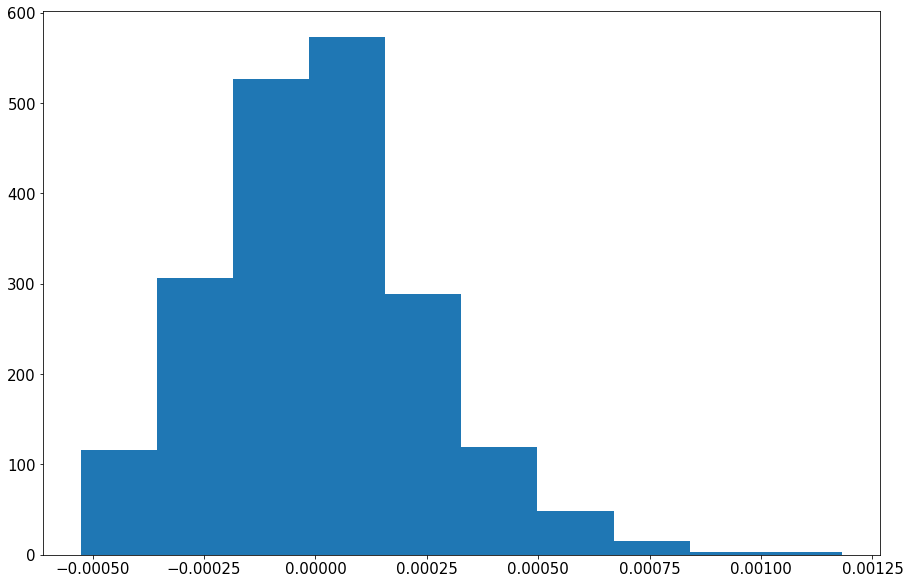

In [43]:
pyplot.hist(arrimp[sorted_idx][-n:])
pyplot.show()

[4856.053 11729.35 4007.497 4019.069 11632.93 11440.07 9681.249 11706.21
 11933.78 11578.93]
[0.00079229 0.00079585 0.00082837 0.00083053 0.00085388 0.00085985
 0.00094603 0.00105664 0.00113984 0.00118107]


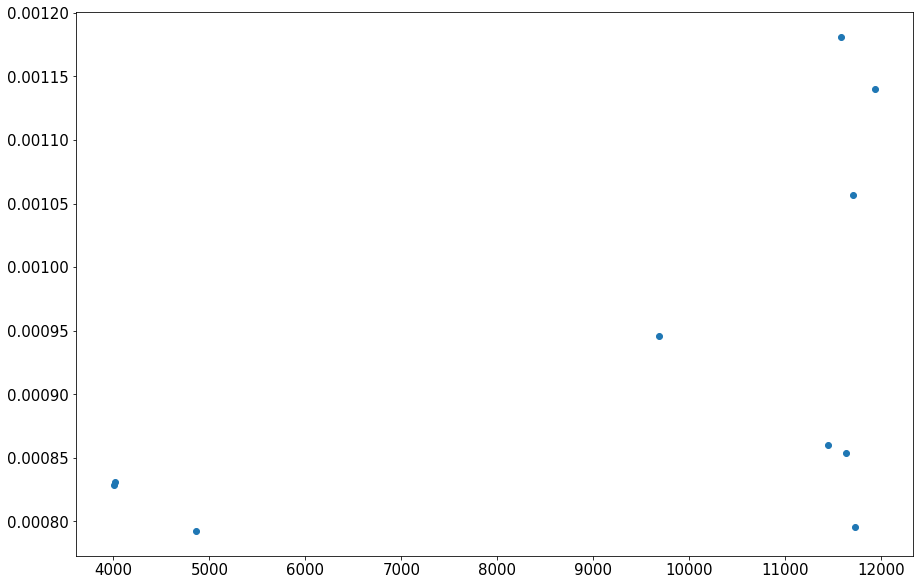

In [47]:
n = 10

pyplot.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['axes.labelsize'] = 15
pyplot.rcParams['axes.titlesize'] = 15


print(attrNames[sorted_idx][-n:])
print(arrimp[sorted_idx][-n:])

pyplot.scatter(attrNames[sorted_idx][-n:], arrimp[sorted_idx][-n:])
# pyplot.barh(np.arange(0, n), arrimp[sorted_idx][-n:])

# # pyplot.barh(range(10), arrimp[10:])

pyplot.show()

In [56]:
# featOrdered = attrNames[sorted_idx][-400:]
# %store featOrdered


Stored 'featOrdered' (ndarray)


In [15]:
%store -r featOrdered


### 6- visualise best 10 features

In [18]:
df_perImp = pd.DataFrame()
df_perImp = df_input_scaled[featOrdered[-10:]]
df_perImp['Condition'] = df['Condition'].values
print(df_perImp)

     4856.053  11729.35  4007.497  4019.069  11632.93  11440.07  9681.249  \
0   -0.403983 -0.809952 -0.394183 -0.416191 -0.808413 -0.802381 -0.707888   
1   -1.867521 -1.043623 -1.999241 -1.980933 -1.041722 -1.043327 -1.020639   
2   -0.504800 -0.936887 -0.530286 -0.553554 -0.934301 -0.931384 -0.922383   
3   -0.978156 -0.960184 -1.034726 -0.989729 -0.960301 -0.960769 -0.955582   
4   -1.620697 -1.082508 -1.577930 -1.633950 -1.080020 -1.081004 -1.135477   
..        ...       ...       ...       ...       ...       ...       ...   
498 -0.321080 -0.275332 -0.519023 -0.490807 -0.287803 -0.304947 -0.337638   
499 -1.014240 -0.307224 -1.142113 -1.142283 -0.322412 -0.339967 -0.380256   
500 -1.911016 -0.521225 -2.051221 -2.053137 -0.534060 -0.558109 -0.595804   
501  1.257737  0.013213  1.535575  1.749993  0.001476 -0.007350 -0.038950   
502  1.012887 -0.040784  1.113597  1.018261 -0.055230 -0.072826 -0.131580   

     11706.21  11933.78  11578.93 Condition  
0   -0.807065 -0.811811 -0.80

/tmp/ipykernel_2983665/2163716932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perImp['Condition'] = df['Condition'].values


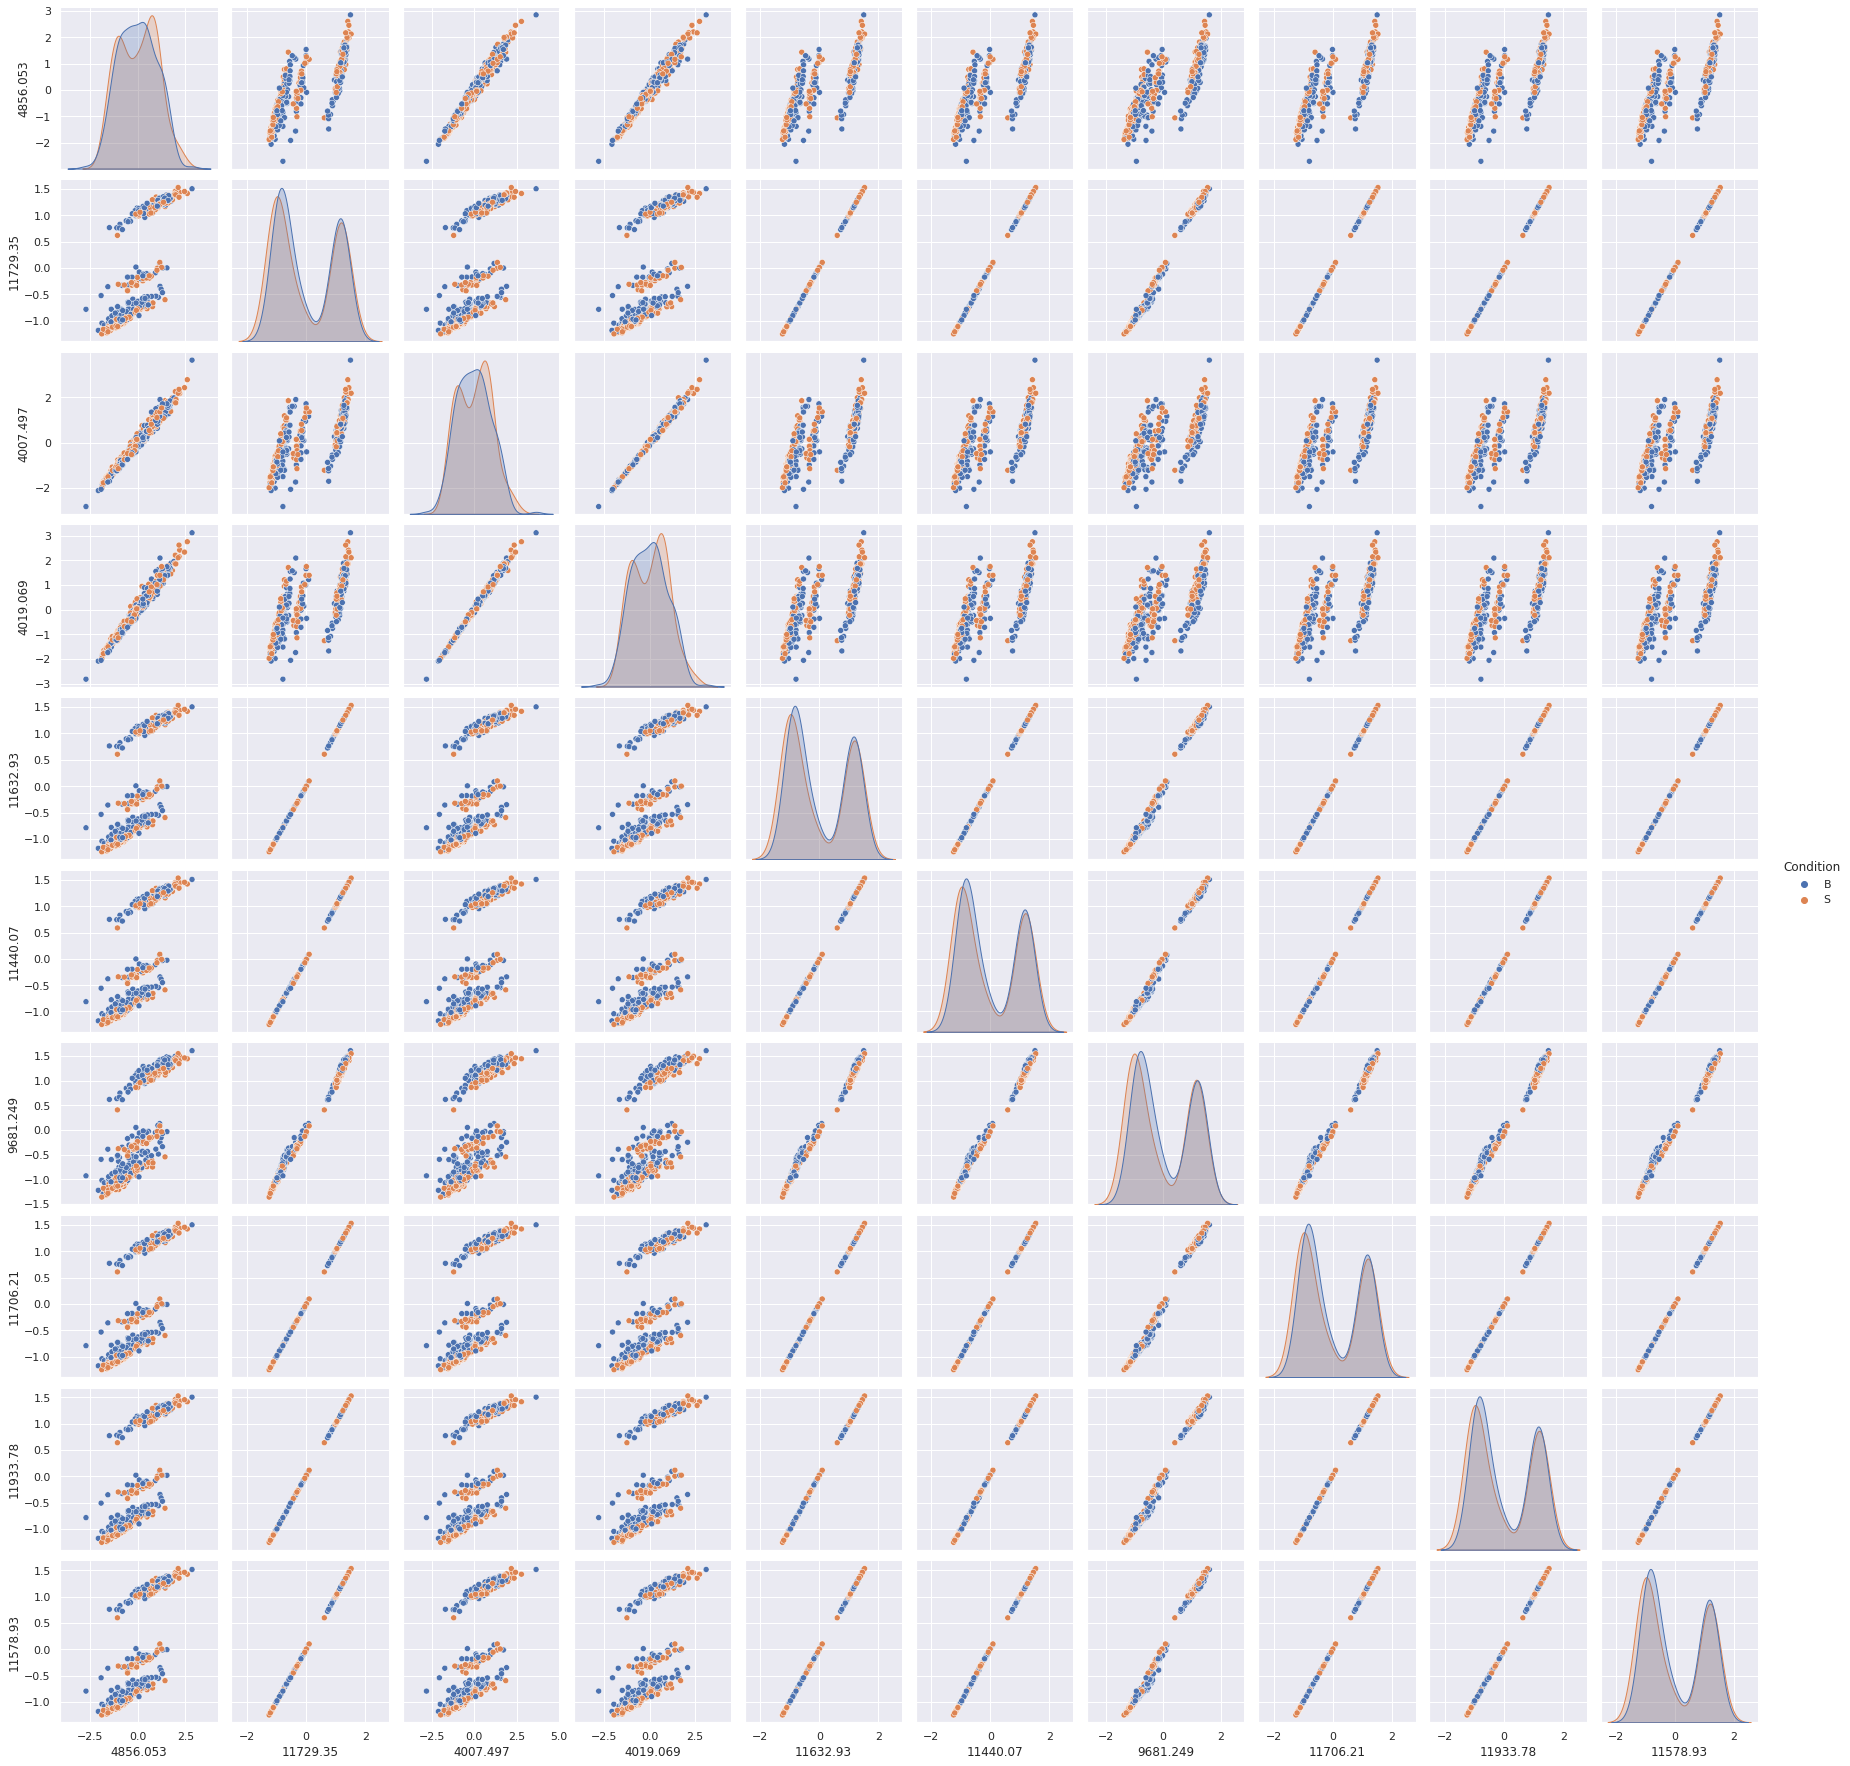

In [19]:
sns.set(font_scale=1)
sns.pairplot(df_perImp, hue="Condition")